<a href="https://colab.research.google.com/github/saurabhsingh1411/reinforcement_learning_UCB/blob/master/UCB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reading the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_csv('Ads_CTR_Optimisation.csv')

In [4]:
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [6]:
dataset.shape

(10000, 10)

## Implementing UCB

In [7]:
import math
N=10000
d=10
ads_selected=[]
numbers_of_selections=[0]*d
sums_of_rewards=[0]*d
total_reward=0

In [9]:
for n in range(0,N):
  ad=0
  max_upper_bound=0
  for i in range(0,d):
    if(numbers_of_selections[i]>0):
      average_reward=sums_of_rewards[i]/numbers_of_selections[i]
      delta_i=math.sqrt(3/2*math.log(n+1)/numbers_of_selections[i])
      upper_bound=average_reward+delta_i
    else : 
      upper_bound=1e400
    if upper_bound > max_upper_bound:
      max_upper_bound=upper_bound
      ad=i
    ads_selected.append(ad)
    numbers_of_selections[ad]=numbers_of_selections[ad]+1
    reward=dataset.values[n,ad]
    sums_of_rewards[ad]=sums_of_rewards[ad]+reward
    total_reward=total_reward+reward

## Visulizing the results

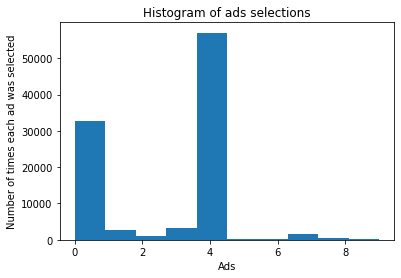

<Figure size 2880x1440 with 0 Axes>

In [13]:
# Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.figure(figsize=(40,20))
plt.show()